In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import shapely as shy
import osmnx as ox
from shapely.ops import nearest_points
from shapely.geometry import Point, MultiPoint

pd.options.display.max_rows = 4
%matplotlib inline

In [2]:
cd D:\Projects\Policy Evaluation\dofiles\

D:\Projects\Policy Evaluation\dofiles


Go to Schools shapefile folder

In [4]:
fp = r"D:\Projects\Policy Evaluation\input_data\school_private_public_2263\school_private_public_2263.shp"
df1 = gpd.read_file(fp)

In [5]:
df1.head(3)

,uid,idagency,facname,opname,address,city,zipcode,bcode,facsubgrp,factype,capacity,util,xcoord,ycoord,geometry
0,192.0,321000145390,Our Lady Of Refuge School,Our Lady Of Refuge School,2708 Briggs Avenue,Bronx,10458,36005,Non-Public K-12 Schools,Elementary School - Non-public,NaN,267.0,1.014359e+06,254977.5176,POINT (1014358.6833 254977.5176)
1,294.0,332000226225,Yeshiva Toldos Yesuscher,Yeshiva Toldos Yesuscher,1531 63 Street,Brooklyn,11219,36047,Non-Public K-12 Schools,Elementary School - Non-public,NaN,74.0,9.857114e+05,166689.5140,POINT (985711.4182 166689.514)
2,2233.0,331400225670,Ohel Elozer,Ohel Elozer,263 Classon Ave-Ste 4b,Brooklyn,11205,36047,Non-Public K-12 Schools,High School - Non-public,NaN,161.0,9.951838e+05,191390.1394,POINT (995183.844 191390.1394)


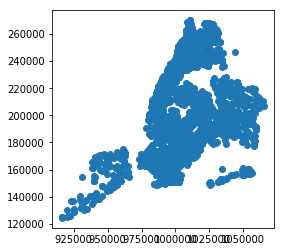

In [6]:
df1.plot()

In [7]:
df1.crs

{'proj': 'lcc',
 'lat_1': 41.03333333333333,
 'lat_2': 40.66666666666666,
 'lat_0': 40.16666666666666,
 'lon_0': -74,
 'x_0': 300000.0000000001,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

Go to intersection shapefile folder

In [8]:
fp =  r"D:\Projects\Policy Evaluation\input_data\intersection_unique_shapefile_2263\intersection_unique_shapefile_2263.shp"
df2 = gpd.read_file(fp)

In [9]:
df2.head(3)

,fid,linearid,fullname,rttyp,mtfcc,linearid_2,fullname_2,rttyp_2,mtfcc_2,longitude,latitude,bcode,bname,name,namelsad,geometry
0,1.0,1101042239898,Baldwin St,M,S1400,1101042288995,None,None,S1640,1025301.152,270701.9341,36005,Bronx,Bronx,Bronx County,POINT (1025301.15279018 270701.934121847)
1,2.0,1101042239898,Baldwin St,M,S1400,1102175695960,Bradley St,M,S1400,1025194.172,270543.9926,36005,Bronx,Bronx,Bronx County,POINT (1025194.172990974 270543.9926886206)
2,7.0,1101042288995,None,None,S1640,1103717136022,Baldwin St,M,S1400,1025251.612,270739.3774,36005,Bronx,Bronx,Bronx County,POINT (1025251.612085536 270739.3774560128)


In [10]:
type(df2)

geopandas.geodataframe.GeoDataFrame

In [11]:
df2.crs

{'proj': 'lcc',
 'lat_1': 41.03333333333333,
 'lat_2': 40.66666666666666,
 'lat_0': 40.16666666666666,
 'lon_0': -74,
 'x_0': 300000.0000000001,
 'y_0': 0,
 'datum': 'NAD83',
 'units': 'us-ft',
 'no_defs': True}

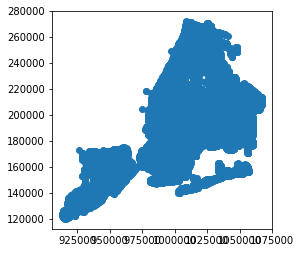

In [12]:
df2.plot()

The following function was copied from https://automating-gis-processes.github.io/2017/lessons/L3/nearest-neighbour.html 

Create unary union from Points, which basically creates a MultiPoint object from the Point geometries.

def nearest(row, geom_union, df1, df2, geom1_col='geometry', geom2_col='geometry', src_column=None):
    """Find the nearest point and return the corresponding value from specified column."""
    # Find the geometry that is closest
    nearest = df2[geom2_col] == nearest_points(row[geom1_col], geom_union)[1]
    # Get the corresponding value from df2 (matching is based on the geometry)
    value = df2[nearest][src_column].get_values()[0]
    return value

intersection_unary_union = intersection_data.unary_union

LPIS_unary_union = LPIS_data.unary_union

intersection_data['nearest_id'] = intersection_data.apply(nearest, geom_union=LPIS_unary_union, df1=intersection_data, df2=LPIS_data, geom1_col='geometry',geom2_col='geometry', src_column='ID', axis=1)

intersection_data.head(3)

The function below is from Prof. Conning

In [13]:
def closest(point, gdf, idcol):
    howfar = gdf.geometry.distance(point)
    ix = howfar.idxmin()
    id = gdf.loc[howfar.idxmin(), idcol]
    
    return  id, howfar[ix].astype('int')

In [14]:
mdistances = df2.geometry.apply(lambda x: closest(x, df1, 'uid'))
df2[['nearest_ID','distance_ID']] = mdistances.apply(pd.Series)

In [15]:
df2.head(3)

,fid,linearid,fullname,rttyp,mtfcc,linearid_2,fullname_2,rttyp_2,mtfcc_2,longitude,latitude,bcode,bname,name,namelsad,geometry,nearest_ID,distance_ID
0,1.0,1101042239898,Baldwin St,M,S1400,1101042288995,None,None,S1640,1025301.152,270701.9341,36005,Bronx,Bronx,Bronx County,POINT (1025301.15279018 270701.934121847),19665.0,2778.0
1,2.0,1101042239898,Baldwin St,M,S1400,1102175695960,Bradley St,M,S1400,1025194.172,270543.9926,36005,Bronx,Bronx,Bronx County,POINT (1025194.172990974 270543.9926886206),19665.0,2596.0
2,7.0,1101042288995,None,None,S1640,1103717136022,Baldwin St,M,S1400,1025251.612,270739.3774,36005,Bronx,Bronx,Bronx County,POINT (1025251.612085536 270739.3774560128),19665.0,2800.0


In [16]:
df2.columns


Index(['fid', 'linearid', 'fullname', 'rttyp', 'mtfcc', 'linearid_2',
       'fullname_2', 'rttyp_2', 'mtfcc_2', 'longitude', 'latitude', 'bcode',
       'bname', 'name', 'namelsad', 'geometry', 'nearest_ID', 'distance_ID'],
      dtype='object')

In [17]:
save_out = df2[['fid','nearest_ID','distance_ID' ]]

In [20]:
save_out.head(3)

,fid,nearest_ID,distance_ID
0,1.0,19665.0,2778.0
1,2.0,19665.0,2596.0
2,7.0,19665.0,2800.0


In [21]:
type(save_out)

pandas.core.frame.DataFrame

In [23]:
fp =  r"D:\Projects\Policy Evaluation\working_data\intersection_to_school.dta"
save_out.to_stata(fp)